In [37]:
## Importing the required python libraries 
import os, sys
import warnings
import timeit
import numpy as np
import pandas as pd 
import pkg_resources
import matplotlib.pyplot as plt
import re
import seaborn as sns
from collections import defaultdict


In [2]:
## Plot the number of genes with less than 5 transposons in all mutants 

pergene_files=[]
#data_dir= "../satay/data_files/data_unmerged/"
#data_dir="../transposonmapper/data_files/files4test/"
data_dir="../postprocessed-data/"
#data_dir="../transposonmapper/data_files/"
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("pergene_insertions.xlsx"):
            pergene_files.append(os.path.join(root, file))

In [3]:
list_data=[]
for i in pergene_files:
    list_data.append(pd.read_excel(i,engine='openpyxl',index_col="Unnamed: 0"))

In [4]:
keys=[]
for i in np.arange(0,len(pergene_files)):
    keys.append(pergene_files[i].split("/")[-1].split("_")[0]+"_"+pergene_files[i].split("/")[-1].split("_")[1])

In [5]:
list_data_pd=pd.concat(list_data,axis=0,keys=keys)

In [6]:
# Number of genes with less than 2 transposons and 2 reads in all mutants
L=[]
for i in np.arange(0,len(keys)):
    tmp=(list_data_pd.loc[keys[i]])
    L.append(len(tmp[(tmp.loc[:,"Insertions"]<2) & (tmp.loc[:,"Reads"]<2)]))



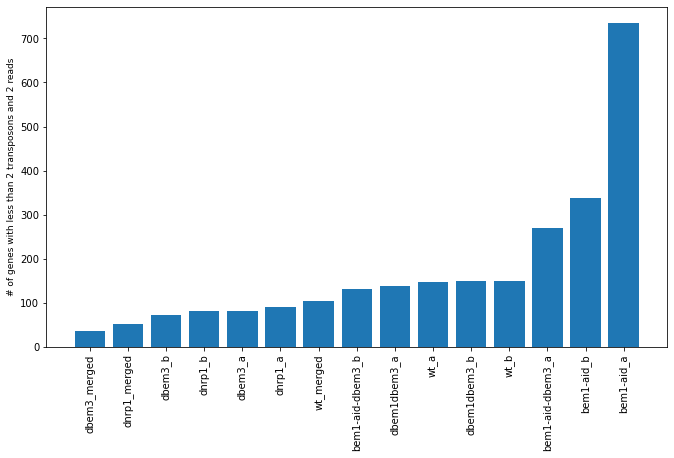

In [7]:
L_dict=dict(zip(keys,L))

A={k: v for k, v in sorted(L_dict.items(), key=lambda item: item[1])}

fig = plt.figure(figsize=(10, 7))
plt.bar(A.keys(),A.values())
plt.xticks(rotation=90);

plt.ylabel("# of genes with less than 2 transposons and 2 reads",fontsize=9)
plt.tight_layout(pad=3)
plt.savefig("../figures/fig_number_genes_with_less_than_2_transposons_and_2_reads.png",dpi=300)


/tmp/ipykernel_9743/2825967748.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels=A.keys(),rotation=90);
/tmp/ipykernel_9743/2825967748.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels=B.keys(),rotation=90);


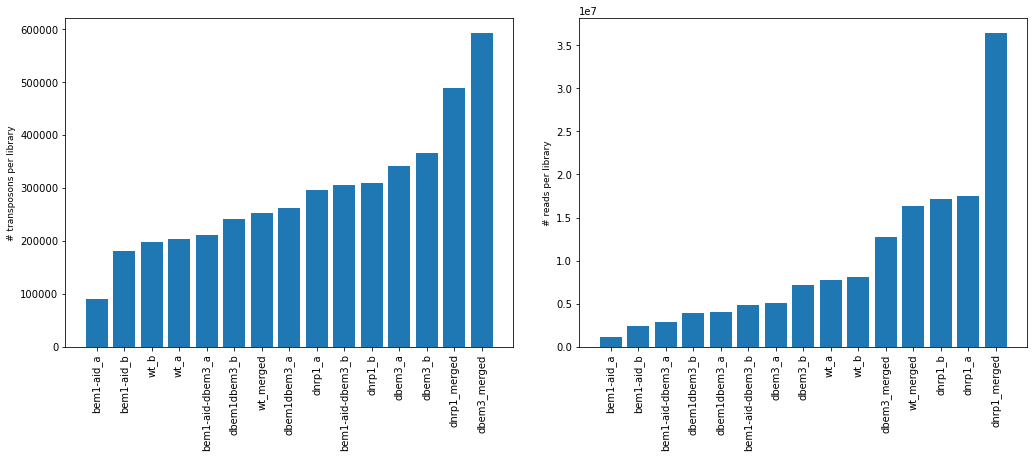

In [8]:
# Number of transposons in each library 
L=[]
R=[]
for i in np.arange(0,len(keys)):
    tmp=(list_data_pd.loc[keys[i]])
    L.append(np.sum(tmp.loc[:,"Insertions"]))
    R.append(np.sum(tmp.loc[:,"Reads"]))

    
L_dict=dict(zip(keys,L))
R_dict=dict(zip(keys,R))

A={k: v for k, v in sorted(L_dict.items(), key=lambda item: item[1])}
B={k: v for k, v in sorted(R_dict.items(), key=lambda item: item[1])}

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
axes[0].bar(A.keys(),A.values())
axes[0].set_xticklabels(labels=A.keys(),rotation=90);
axes[0].set_ylabel("# transposons per library",fontsize=9)

axes[1].bar(B.keys(),B.values())
axes[1].set_xticklabels(labels=B.keys(),rotation=90);
axes[1].set_ylabel("# reads per library",fontsize=9)

plt.savefig("../figures/fig_number_insertions_and_reads_for_all_libraries.png",dpi=300)

plt.tight_layout(pad=3)

In [9]:
from module_intergenic_model import adding_features2dataframe,getting_r

list_data_extended=[]
for i in np.arange(0,len(keys)):
    tmp=(list_data_pd.loc[keys[i]])
    list_data_extended.append(adding_features2dataframe(tmp))



/data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Data-analysis-multiple-strains/src/module_intergenic_model.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tr-density"]=np.nan
/data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Data-analysis-multiple-strains/src/module_intergenic_model.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["reads-per-tr"]=np.nan
/data/localhome/linigodelacruz/Documents/PhD_2018/Documentat

In [12]:
list_data_extended_pd=pd.concat(list_data_extended,axis=0,keys=keys)

/tmp/ipykernel_9743/1771615265.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels=A.keys(),rotation=90);
/tmp/ipykernel_9743/1771615265.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels=B.keys(),rotation=90);


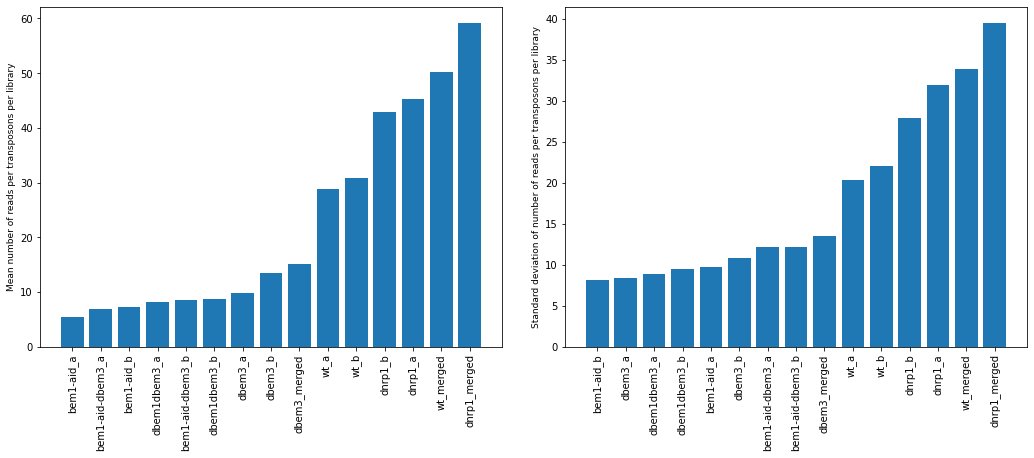

In [13]:
# Number of reads per transposons per library
L=[]
R=[]
for i in np.arange(0,len(keys)):
    tmp=(list_data_extended_pd.loc[keys[i]])
    L.append(tmp.loc[:,"reads-per-tr"].mean())
    R.append(tmp.loc[:,"reads-per-tr"].std())

L_dict=dict(zip(keys,L))
R_dict=dict(zip(keys,R))

A={k: v for k, v in sorted(L_dict.items(), key=lambda item: item[1])}
B={k: v for k, v in sorted(R_dict.items(), key=lambda item: item[1])}

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
axes[0].bar(A.keys(),A.values())
axes[0].set_xticklabels(labels=A.keys(),rotation=90);
axes[0].set_ylabel("Mean number of reads per transposons per library",fontsize=9)

axes[1].bar(B.keys(),B.values())
axes[1].set_xticklabels(labels=B.keys(),rotation=90);
axes[1].set_ylabel("Standard deviation of number of reads per transposons per library",fontsize=9)

plt.tight_layout(pad=3)

In [23]:
list_data_rates=[]
for i in np.arange(0,len(keys)):
    tmp=(list_data_extended_pd.loc[keys[i]])
    list_data_rates.append(getting_r(tmp))



/data/localhome/linigodelacruz/anaconda3/envs/transposonmapper/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/data/localhome/linigodelacruz/anaconda3/envs/transposonmapper/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/data/localhome/linigodelacruz/anaconda3/envs/transposonmapper/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/localhome/linigodelac

In [40]:
rates_dict=dict(zip(keys,list_data_rates))

rates_norm_dict=defaultdict(dict)

for i in np.arange(0,len(keys)):
    tmp=(rates_dict[keys[i]])
    rates_norm_dict[keys[i]]=np.divide(tmp,rates_dict["wt_merged"])

/tmp/ipykernel_9743/956200865.py:7: RuntimeWarning: invalid value encountered in true_divide
  rates_norm_dict[keys[i]]=np.divide(tmp,rates_dict["wt_merged"])


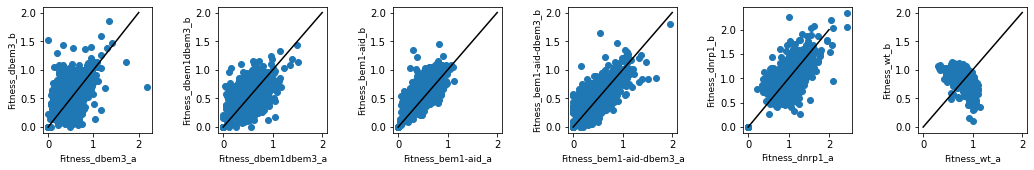

In [52]:
## Fitness plots  normalized to the values of wt_merged

keys_fitness=["dbem3_a","dbem3_b", "dbem1dbem3_a", "dbem1dbem3_b",
"bem1-aid_a","bem1-aid_b","bem1-aid-dbem3_a", "bem1-aid-dbem3_b",
"dnrp1_a","dnrp1_b", "wt_a", "wt_b"]
plt.subplots(nrows=1,ncols=6,figsize=(15, 3))
j=1
for i in np.arange(0,len(keys_fitness),2):
    plt.subplot(1,6,j)
    plt.scatter(rates_norm_dict[keys_fitness[i]],rates_norm_dict[keys_fitness[i+1]])
    plt.plot(np.arange(0,2.1,0.1),np.arange(0,2.1,0.1),color="black")
   
    plt.ylabel("Fitness_" + keys_fitness[i+1],fontsize=9)
    plt.xlabel("Fitness_" + keys_fitness[i],fontsize=9)
    plt.tight_layout(pad=3)
    
    j=j+1
plt.savefig("../figures/fig_fitness_scatter_normalized_wt_merged.png",dpi=300)

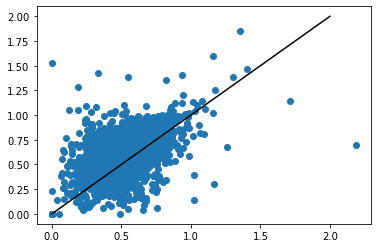

In [44]:
plt.scatter(rates_norm_dict["dbem3_a"],rates_norm_dict["dbem3_b"])
plt.plot(np.arange(0,2.1,0.1),np.arange(0,2.1,0.1),color="black")

In [42]:
keys

['dbem3_b',
 'dnrp1_b',
 'bem1-aid_a',
 'dnrp1_a',
 'dbem1dbem3_b',
 'wt_merged',
 'dbem1dbem3_a',
 'bem1-aid-dbem3_a',
 'bem1-aid-dbem3_b',
 'wt_b',
 'wt_a',
 'dnrp1_merged',
 'bem1-aid_b',
 'dbem3_merged',
 'dbem3_a']